Task 0: read, clean and explore dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/Users/andreeabodea/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_initial = pd.read_csv('monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')
df_initial

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [3]:
# df.head(50)
# df.tail(10)
# display(df)
# df.describe()
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2016 non-null   object 
 1   AUSPRAEGUNG                     2016 non-null   object 
 2   JAHR                            2016 non-null   int64  
 3   MONAT                           2016 non-null   int64  
 4   WERT                            1848 non-null   float64
 5   VORJAHRESWERT                   1848 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1763 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 141.9+ KB


In [4]:
# drop the records which come after 2020
df = df_initial[df_initial['JAHR'] <= 2020]
df = df.reset_index(drop=True)
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2020,202001,28.0,22.0,-20.00,27.27,37.0
1,Alkoholunfälle,insgesamt,2020,202002,40.0,28.0,42.86,42.86,38.0
2,Alkoholunfälle,insgesamt,2020,202003,27.0,34.0,-32.50,-20.59,37.0
3,Alkoholunfälle,insgesamt,2020,202004,26.0,36.0,-3.70,-27.78,36.0
4,Alkoholunfälle,insgesamt,2020,202005,40.0,39.0,53.85,2.56,36.0
...,...,...,...,...,...,...,...,...,...
1759,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
1760,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
1761,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
1762,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [5]:
# select only the first 4 (5) relevant columns: 'MONATSZAHL' (category), 'AUSPRAEGUNG' (accident-type), ('JAHR',) 'MONAT', 'WERT'
df = df[['MONATSZAHL', 'AUSPRAEGUNG', 'MONAT', 'WERT']]
df

,MONATSZAHL,AUSPRAEGUNG,MONAT,WERT
0,Alkoholunfälle,insgesamt,202001,28.0
1,Alkoholunfälle,insgesamt,202002,40.0
2,Alkoholunfälle,insgesamt,202003,27.0
3,Alkoholunfälle,insgesamt,202004,26.0
4,Alkoholunfälle,insgesamt,202005,40.0
...,...,...,...,...
1759,Verkehrsunfälle,Verletzte und Getötete,200008,647.0
1760,Verkehrsunfälle,Verletzte und Getötete,200009,675.0
1761,Verkehrsunfälle,Verletzte und Getötete,200010,615.0
1762,Verkehrsunfälle,Verletzte und Getötete,200011,578.0


In [6]:
df.info()
# df_filtered.dropna(inplace=True) -> no NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1764 non-null   object 
 1   AUSPRAEGUNG  1764 non-null   object 
 2   MONAT        1764 non-null   int64  
 3   WERT         1764 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 55.2+ KB


In [7]:
# transfor first 2 columns from object to string

df['MONATSZAHL'] = df['MONATSZAHL'].astype("string")
df['AUSPRAEGUNG'] = df['AUSPRAEGUNG'].astype("string")
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1764 non-null   string 
 1   AUSPRAEGUNG  1764 non-null   string 
 2   MONAT        1764 non-null   int64  
 3   WERT         1764 non-null   float64
dtypes: float64(1), int64(1), string(2)
memory usage: 55.2 KB


In [8]:
# transfor column with date info from int to datetime

df['MONAT'] = df['MONAT'].astype("string")
df['MONAT'] = pd.to_datetime(df['MONAT'].astype("string"), format='%Y%m', errors='coerce')
df = df.sort_values(by='MONAT')
df = df.reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   MONATSZAHL   1764 non-null   string        
 1   AUSPRAEGUNG  1764 non-null   string        
 2   MONAT        1764 non-null   datetime64[ns]
 3   WERT         1764 non-null   float64       
dtypes: datetime64[ns](1), float64(1), string(2)
memory usage: 55.2 KB


In [9]:
auspraegung_values = df["AUSPRAEGUNG"].unique()
print(auspraegung_values)
# AUSPRAEGUNG = 'insgesamt' -> total for all subcategories

monatszahl_values = df["MONATSZAHL"].unique()
print(monatszahl_values)

<StringArray>
['Verletzte und Getötete', 'mit Personenschäden', 'insgesamt']
Length: 3, dtype: string
<StringArray>
['Fluchtunfälle', 'Verkehrsunfälle', 'Alkoholunfälle']
Length: 3, dtype: string


Task 1: visualise historically the number of accidents per category (column1: MONATSZAHL)

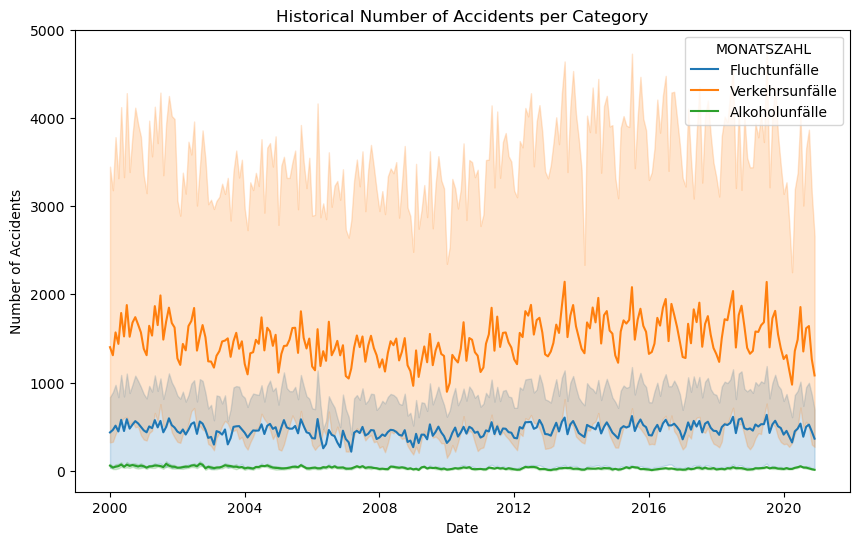

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MONAT', y='WERT', hue='MONATSZAHL', data=df)
plt.title('Historical Number of Accidents per Category')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.show()

Task 2: create an application that forecasts the values for Category: 'Alkoholunfälle', Type: 'insgesamt', Year: '2021' and Month: '01'

Mean Squared Error: 162.32722080928062
Forecasted Value: 24.059923350969157
Ground Truth Value: 14.0


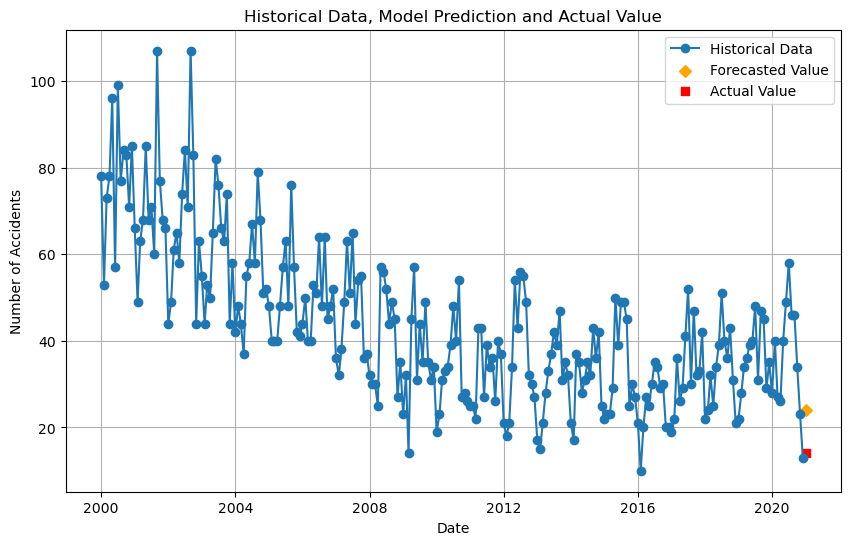

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

filtered_df = df[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt')]

features = ['MONAT']
target = 'WERT'

filtered_df['MONTH_NUMERIC'] = (filtered_df['MONAT'] - filtered_df['MONAT'].min()) / np.timedelta64(1, 'M')

X_train, X_test, y_train, y_test = train_test_split(
    filtered_df[['MONTH_NUMERIC']],
    filtered_df[target],
    test_size = 0.2,  
    random_state = 42  # seed for reproducibility
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

forecast_month_numeric = (pd.to_datetime('2021-01') - filtered_df['MONAT'].min()) / np.timedelta64(1, 'M')
forecasted_value = model.predict([[forecast_month_numeric]])[0]
print(f'Forecasted Value: {forecasted_value}')

ground_truth = df_initial[(df_initial['MONATSZAHL'] == 'Alkoholunfälle') & (df_initial['AUSPRAEGUNG'] == 'insgesamt') & (df_initial['MONAT'] == 202102)]['WERT'].values[0]
print(f'Ground Truth Value: {ground_truth}')

plt.figure(figsize=(10, 6))
plt.plot(filtered_df['MONAT'], filtered_df['WERT'], label='Historical Data', marker='o', linestyle='-')
plt.scatter(pd.to_datetime('2021-01'), forecasted_value, label='Forecasted Value', marker='D', color='orange')
plt.scatter(pd.to_datetime('2021-01'), ground_truth, label='Actual Value', marker='s', color='red')
plt.title('Historical Data, Model Prediction and Actual Value')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()